In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
data = pd.read_csv('nyc_airbnb.csv')

In [3]:
data 


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
data.drop(['host_name','host_id','name','neighbourhood','last_review'], axis=1, inplace=True)


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.1+ MB


In [7]:
data.head()

,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [8]:
data.tail()

,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Brooklyn,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,36485057,Brooklyn,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,36485431,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,Manhattan,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2
48894,36487245,Manhattan,40.76404,-73.98933,Private room,90,7,0,NaN,1,23


In [9]:
data.index


RangeIndex(start=0, stop=48895, step=1)

In [10]:
data.shape

(48895, 11)

In [11]:
data.isnull().sum()


id                                    0
neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [13]:
data.fillna({'reviews_per_month':0}, inplace=True)


In [14]:
data.isnull().sum()


id                                0
neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [15]:
data.head(100)

,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
95,21293,Brooklyn,40.70093,-73.92609,Entire home/apt,105,3,118,1.05,2,9
96,21456,Manhattan,40.79764,-73.96177,Entire home/apt,140,3,81,0.71,1,198
97,21644,Manhattan,40.82803,-73.94731,Private room,89,1,1,0.11,1,365
98,21794,Manhattan,40.74008,-74.00271,Private room,98,30,30,0.27,2,364


In [18]:
data_1 = data.loc[data['price'] > 0]
data_2 = data_1.copy()

In [19]:
data_2.loc[data_2['price'] == 0] # checking again to make sure 

,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


In [20]:
data.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<AxesSubplot:xlabel='availability_365'>

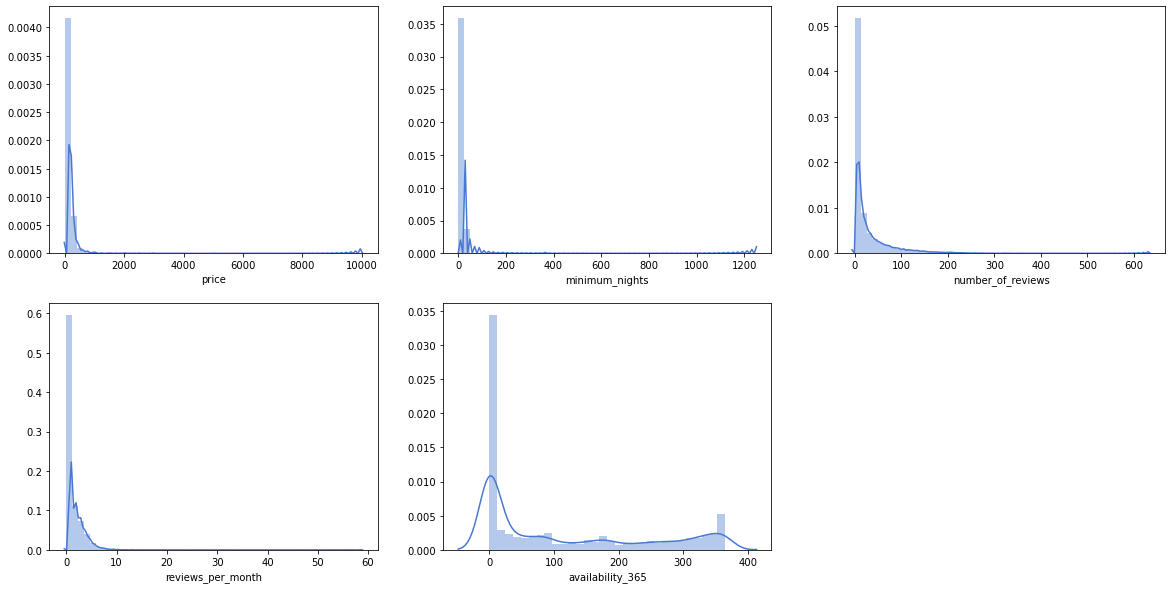

In [21]:
sns.set_palette("muted")
from pylab import *
f, ax = plt.subplots(figsize=(20, 10))

subplot(2,3,1)
sns.distplot(data_2['price'])

subplot(2,3,2)
sns.distplot(data_2['minimum_nights'])

subplot(2,3,3)
sns.distplot(data_2['number_of_reviews'])

subplot(2,3,4)
sns.distplot(data_2['reviews_per_month'])

subplot(2,3,5)
sns.distplot(data_2['availability_365'])

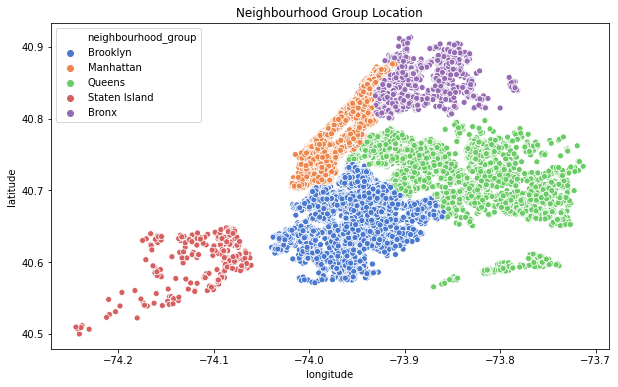

In [22]:
# plot location in relation to Neighbourhood group 
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(data_2.longitude,data_2.latitude,hue=data_2.neighbourhood_group).set_title(title)
plt.ioff()

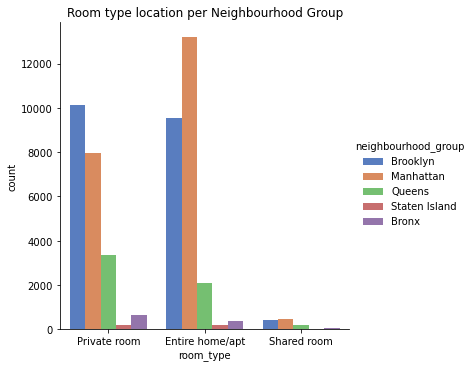

In [27]:
title = 'Room type location per Neighbourhood Group'
sns.catplot(x='room_type', kind="count", hue="neighbourhood_group", data=data);
plt.title(title)
plt.ioff()

#Observation: 
#Brooklyn and Manhattan has the more properties than other neighbourhood, mostly private and entire apt
#These two neighbourhoods are probably more expensive given the popular room_type in this area

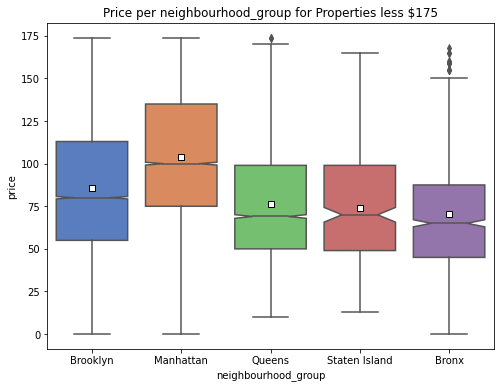

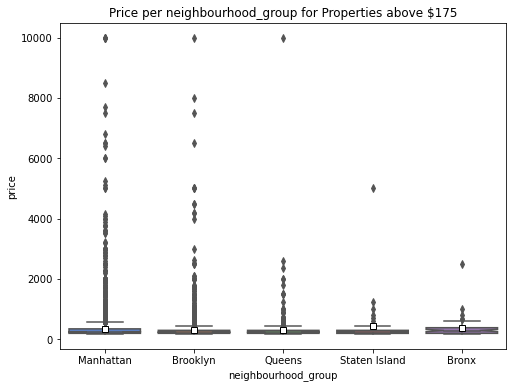

In [54]:
# plot price in relation to neighbourhood group 

x='neighbourhood_group'
y='price'

title = 'Price per neighbourhood_group for Properties less $175'
data_filtered = data_2.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per neighbourhood_group for Properties above $175'
data_filtered = data_2.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

#As expected, Brooklym and Mahattan has higher price on average compared to other neighbourhood
#Brooklyn and Mahattan also has a larger spread of price due to higher options available

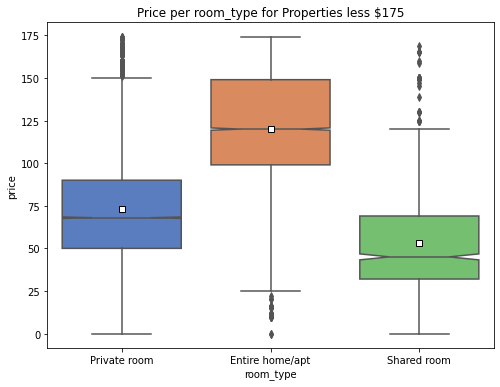

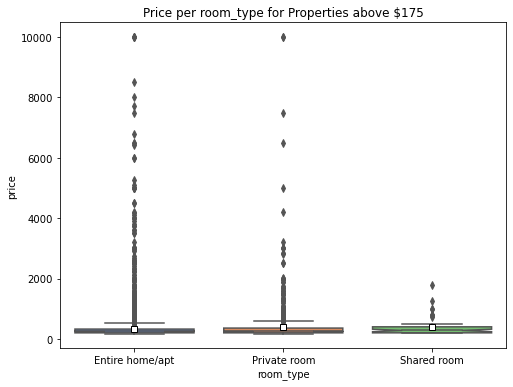

In [56]:
# plot price in relation to room type 

x='room_type'
y='price'

title = 'Price per room_type for Properties less $175'
data_filtered = data_2.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per room_type for Properties above $175'
data_filtered = data_2.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

#Obviously, Entire home has the highest price point, followed by private room and shared room
#Entire home has a slightly larger spread of price compared to other options

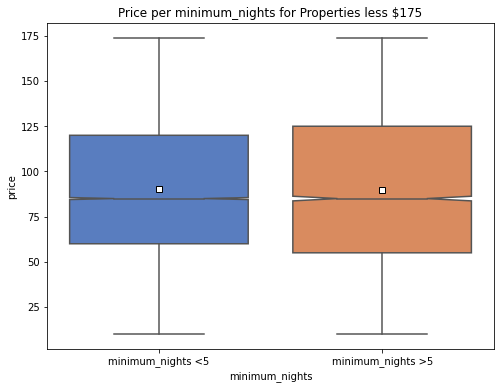

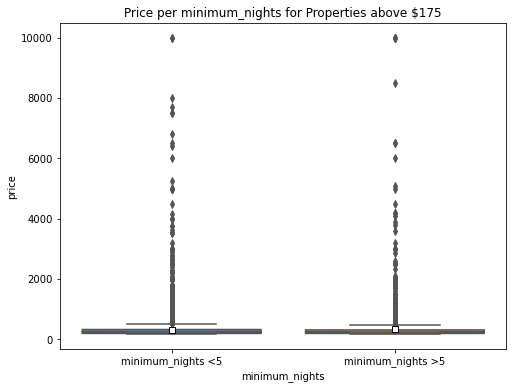

In [27]:
# plot price in relation to minimum nights 
# qcut under 75 % -- 5 days, above 75% - above 5 days #minimum_nights  
data_encoded = data_2.copy()
data_encoded['minimum_nights'] = pd.qcut(data['minimum_nights'],q=[0,0.75,1], labels=["minimum_nights <5", "minimum_nights >5"])

x='minimum_nights'
y="price"

title = 'Price per minimum_nights for Properties less $175'
data_filtered = data_encoded.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per minimum_nights for Properties above $175'
data_filtered = data_encoded.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

#The number of minimum nights does not have a big influence on the price point of airbnb

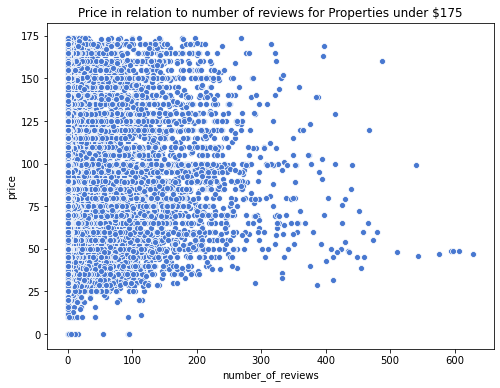

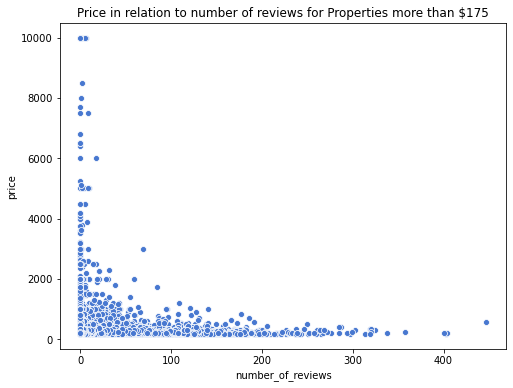

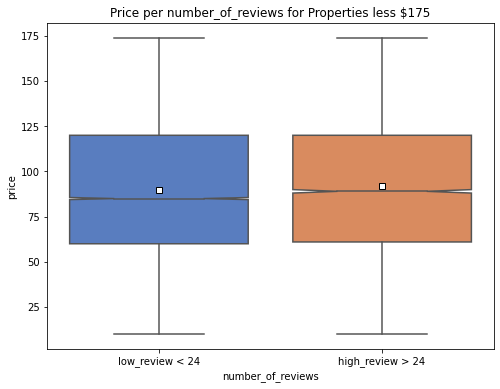

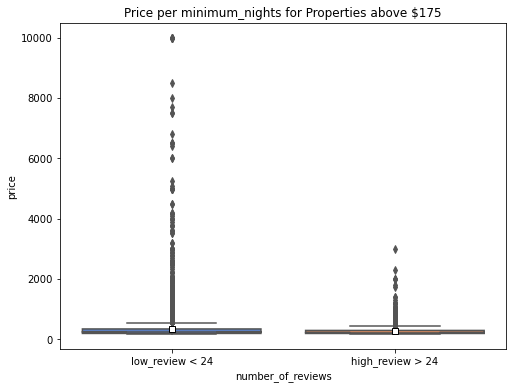

In [28]:
# plot price in relation to number of reviews for properties 
# qcut under 75 % -- 24 reviews, above 75% - above 24 reviews #number of reveiws
sns.set_palette("muted")
x = 'number_of_reviews'
y = 'price'

data_encoded['number_of_reviews'] = pd.qcut(data['number_of_reviews'],q=[0,0.75,1], labels=["low_review < 24", "high_review > 24"])


title = 'Price in relation to number of reviews for Properties under $175'
data_filtered = data.loc[(data['price'] < 175)]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price in relation to number of reviews for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price per number_of_reviews for Properties less $175'
data_filtered = data_encoded.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per minimum_nights for Properties above $175'
data_filtered = data_encoded.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

#The number of reviews does not have a big influence on the price point of airbnb

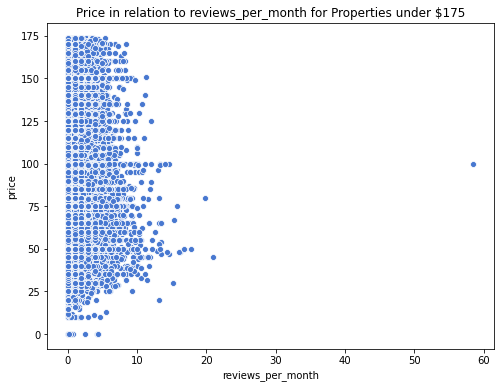

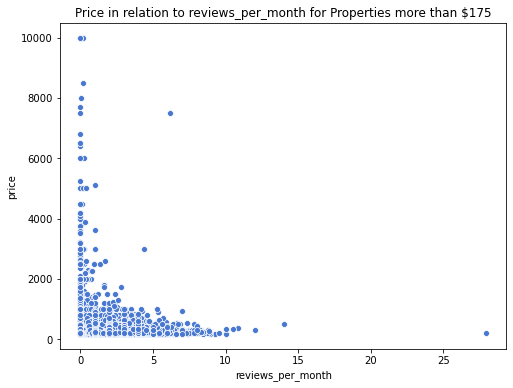

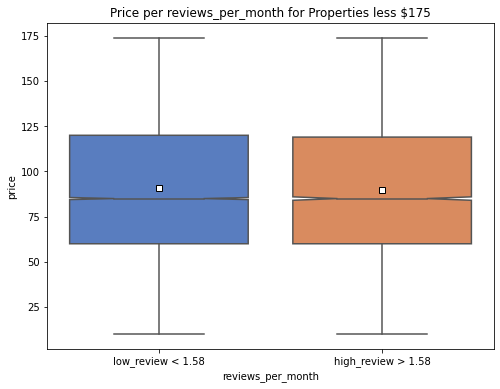

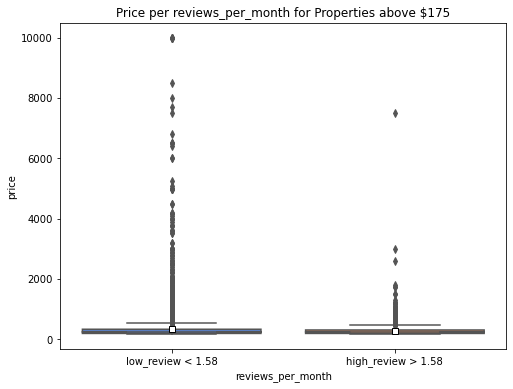

In [29]:
# plot price in relation to reviews per month for properties 
# qcut under 75 % -- 1.58, above 75% - above 1.58 reviews_per_month
sns.set_palette("muted")
x = 'reviews_per_month'
y = 'price'

data_encoded['reviews_per_month'] = pd.qcut(data['reviews_per_month'],q=[0,0.75,1], labels=["low_review < 1.58", "high_review > 1.58"])


title = 'Price in relation to reviews_per_month for Properties under $175'
data_filtered = data.loc[(data['price'] < 175)]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price in relation to reviews_per_month for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price per reviews_per_month for Properties less $175'
data_filtered = data_encoded.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per reviews_per_month for Properties above $175'
data_filtered = data_encoded.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

#The number of reviews per month does not have a big influence on the price point of airbnb

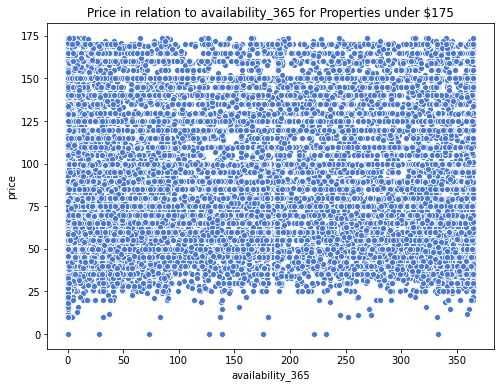

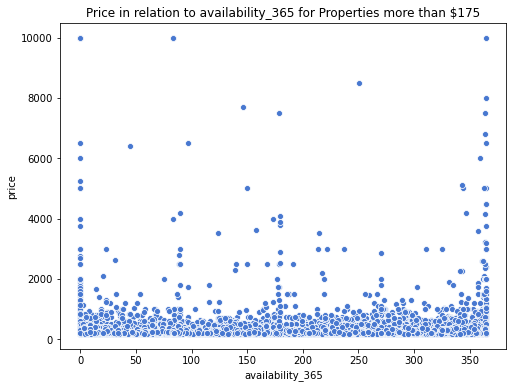

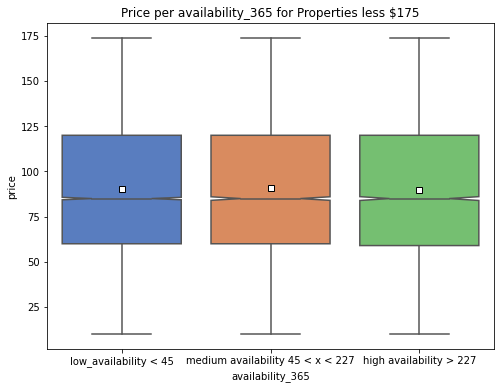

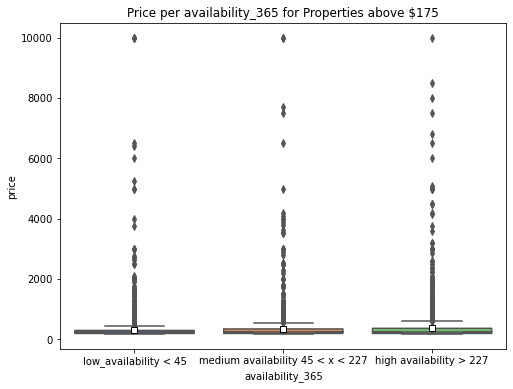

In [47]:
# plot price in relation to availability for properties 
# qcut under 75 % -- 45, above 75% - above 45 available days
sns.set_palette("muted")
x = 'availability_365'

labels = ["low_availability < 45", "medium availability 45 < x < 227", "high availability > 227"]
data_encoded['availability_365'] = pd.qcut(data['availability_365'], q=[0, .5, .75, 1],labels=labels)


title = 'Price in relation to availability_365 for Properties under $175'
data_filtered = data.loc[(data['price'] < 175)]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price in relation to availability_365 for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price per availability_365 for Properties less $175'
data_filtered = data_encoded.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per availability_365 for Properties above $175'
data_filtered = data_encoded.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

#The availability of airbnb does not have a big influence on the price point

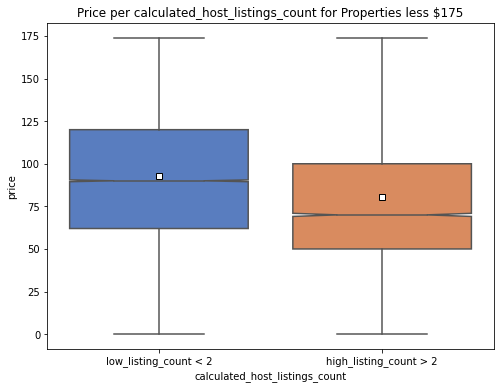

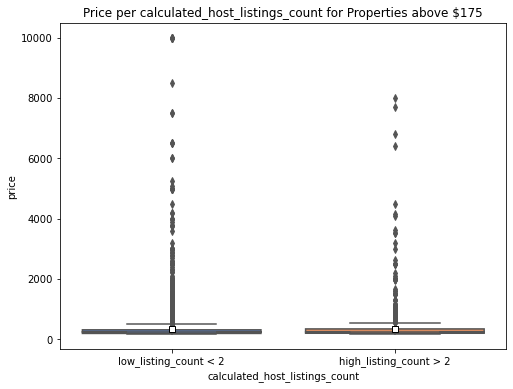

In [82]:
# plot price in relation to calculated_host_listings_count
# qcut under 75 % -- 5 days, above 75% - above 5 days #minimum_nights  
data_encoded = data_2.copy()
data_encoded['calculated_host_listings_count'] = pd.qcut(data['calculated_host_listings_count'],q=[0,0.75,1], labels=["low_listing_count < 2","high_listing_count > 2"])

x='calculated_host_listings_count'
y="price"

title = 'Price per calculated_host_listings_count for Properties less $175'
data_filtered = data_encoded.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per calculated_host_listings_count for Properties above $175'
data_filtered = data_encoded.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

#Price tend to be higher for host with single listing, compared to those with more than two listings
#Reasons for this could be host with +2 listings can afford to compete for lower price